In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('games.csv')

In [3]:
df.shape

(71716, 39)

# Preporcessing

## Quick Cleaning

In [4]:
df.duplicated().sum()

0

In [5]:
df=df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

## Renaming Columns

In [7]:
df.columns


Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [8]:
df = df.rename(columns={'Supported languages': 'language', 'Release date': 'Release_Date',
                        'Estimated owners': 'Estimated_Owners',
                        'Peak CCU': 'Peak_CCU','Required age': 'Req_Age',
                        'About the game': 'Overview',
                         'Score rank': 'Score_Rank',
                        'Metacritic score': 'Metacritic_Score',
                        'User score': 'User_Score',
                        'Average playtime forever':'Average_playtime_forever',
                        'Average playtime two weeks':'Average_playtime_2weeks',
                        'Median playtime forever':'Median_playtime_forever', 
                        'Median playtime two weeks': 'Median_playtime_forever',
                        })

In [9]:
df.head()

,AppID,Name,Release_Date,Estimated_Owners,Peak_CCU,Req_Age,Price,DLC count,Overview,language,...,Average_playtime_2weeks,Median_playtime_forever,Median_playtime_forever,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [10]:
df=df.iloc[:20000]

In [11]:
df.head()

,AppID,Name,Release_Date,Estimated_Owners,Peak_CCU,Req_Age,Price,DLC count,Overview,language,...,Average_playtime_2weeks,Median_playtime_forever,Median_playtime_forever,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## Switching User's choice to first row

In [12]:
index1 = df.loc[df['Name'] == 'Train Bandit'].index[0]

In [13]:
print(index1)

1


In [14]:
row_to_move = df.iloc[index1]  # save the row as a Series
df= df.drop(index1, axis=0)  # remove the row from the DataFrame
df = row_to_move.to_frame().transpose().append(df)  # append the row to the top of the DataFrame


C:\Users\edoar\AppData\Local\Temp\ipykernel_5496\329920085.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = row_to_move.to_frame().transpose().append(df)  # append the row to the top of the DataFrame


In [15]:
df=df.reset_index(drop=True)

In [16]:
df.head()

,AppID,Name,Release_Date,Estimated_Owners,Peak_CCU,Req_Age,Price,DLC count,Overview,language,...,Average_playtime_2weeks,Median_playtime_forever,Median_playtime_forever,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## Put all the needed words are in the column called Tags

In [17]:
df['Categories'] = df['Categories'].str.replace(" ", "")

In [18]:
df['Categories'] = df['Categories'].str.replace(",", " ")

In [19]:
df['Tags'] = df['Tags'].str.replace(" ", "")

In [20]:
df['Tags']=df['Tags'].str.replace(",", " ")

In [21]:
df['Genres'] = df['Genres'].str.replace(" ", "")

In [22]:
df['Genres'] = df['Genres'].str.replace(",", " ")

In [23]:
df['Tags']=df['Overview']+df['Categories']+df['Genres']+df['Tags']

In [24]:
df['Tags'][0]

"THE LAW!! Looks to be a showdown atop a train. This will be your last fight. Good luck, Train Bandit. WHAT IS THIS GAME? Train Bandit is a simple score attack game. The Law will attack you from both sides. Your weapon is your keyboard. You'll use those keys to kick the living shit out of the law. React quickly by attacking the correct direction. React...or you're dead. THE FEATURES Unlock new bandits Earn Achievements Become Steam's Most Wanted ? Battle elite officers Kick the law's assSingle-player SteamAchievements Fullcontrollersupport SteamLeaderboards RemotePlayonPhone RemotePlayonTablet RemotePlayonTVAction IndieIndie Action PixelGraphics 2D Retro Arcade ScoreAttack Minimalist Comedy Singleplayer Fast-Paced Casual Funny Parody Difficult Gore Violent Western Controller Blood"

Extracted only the year from the release date and change it to int type

## Parsing Date

In [25]:
df['Release_Date'] = df['Release_Date'].str.rsplit(',').str[-1] 

In [26]:
df['Release_Date'] = df['Release_Date'].str.replace(" ", "")

In [27]:
df= df[df['Release_Date'].str.len() <=4]

In [28]:
df['Release_Date'] = df['Release_Date'].astype('int')

Below is your needed dataframe, feel free to add any columns that you feel will be useful.
-All the columns are integers or floats excpet the "Tags" of course.
- You can split and merge the column as you wish to build your recommendation system

In [29]:
cols={'Price','User_Score','Positive','Negative','Score_Rank','Achievements',
      'Recommendations','Tags','Release_Date','Name'}

In [30]:
data=df[cols]

C:\Users\edoar\AppData\Local\Temp\ipykernel_5496\3217044890.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data=df[cols]


In [31]:
data = data.reindex(columns=['Price','User_Score','Positive','Negative','Achievements',
      'Recommendations','Tags','Release_Date','Name'])

In [32]:
data.shape

(19967, 9)

In [33]:
data.head()

,Price,User_Score,Positive,Negative,Achievements,Recommendations,Tags,Release_Date,Name
0,0.99,0,53,5,12,0,THE LAW!! Looks to be a showdown atop a train....,2017,Train Bandit
1,19.99,0,6,11,30,0,Galactic Bowling is an exaggerated and stylize...,2008,Galactic Bowling
2,4.99,0,0,0,0,0,NaN,2021,Jolt Project
3,5.99,0,3,0,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,2020,Henosis™
4,0.0,0,50,8,17,0,ABOUT THE GAME Play as a hacker who has arrang...,2020,Two Weeks in Painland


## Transform to int

In [34]:
data.iloc[:, :6] = data.iloc[:, :6].astype(int)

## Scale

In [35]:
scaler = MinMaxScaler()

In [36]:
data_first_6 = data.iloc[:, :6]
data_scaled_first_6 = pd.DataFrame(scaler.fit_transform(data_first_6), columns=data_first_6.columns)
data = pd.concat([data_scaled_first_6, data.iloc[:, 6:]], axis=1)

# Content Based RecSys

In [37]:
data = data.fillna('')
# Remove consecutive spaces resulting from NaN values
data['Tags'] = df['Tags'].str.replace('\s+', ' ')


C:\Users\edoar\AppData\Local\Temp\ipykernel_5496\1840813370.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Tags'] = df['Tags'].str.replace('\s+', ' ')


In [38]:
contains_nan = data['Tags'].str.contains('NaN')

# Count the number of cells containing 'NaN'
num_nan = contains_nan.sum()
print(num_nan)

2


In [39]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(max_features=5000,stop_words='english')


In [40]:
vector=cv.fit_transform(data['Tags'].fillna('')).toarray()

In [41]:
similarity=cosine_similarity(vector)

In [42]:
game_list=sorted(list(enumerate(similarity[0])),reverse=True, key=lambda x:x[1])[1:11]

In [43]:
print(game_list)

[(13166, 0.2988330219628693), (7826, 0.29688376619217477), (7774, 0.2842676218074806), (7930, 0.2805979290422808), (101, 0.2770467068479356), (8814, 0.27595544297684965), (13369, 0.2753211747598376), (11942, 0.27411520674292766), (2361, 0.27091418459143857), (4408, 0.26772644895189607)]


## Put list into dataframe

In [44]:
game_ids=[]

In [45]:
def Get_IDs(game_ids,hlist): 
  for i in hlist:
   game_ids.append(i[0])

In [46]:
Get_IDs(game_ids,game_list)

In [47]:
game_ids

[13166, 7826, 7774, 7930, 101, 8814, 13369, 11942, 2361, 4408]

In [48]:
list_of_games=pd.DataFrame(index=range(10), columns=range(9))

In [49]:
index=-1
for i in game_ids:
  index=index+1
  list_of_games.iloc[index]=data.iloc[i]

In [50]:
list_of_games = list_of_games.rename(columns={0:'Price', 1: 'User_Score',
                                              2:'Positive',
                                              3:'Negative',
                                              4:'Achievements',
                                              5:'Recommendations',
                                              6:'Tags',
                                              7:'Release_Date',
                                              8:'Name'})

##Ordering

In [51]:
list_of_games['XFactor']=list_of_games['Positive']+list_of_games['User_Score']+list_of_games['Recommendations']

In [52]:
price_ordered=list_of_games.sort_values(by=['Price'],ascending=False)

In [53]:
Release_Ordered=list_of_games.sort_values(by=['Release_Date'],ascending=False)

In [54]:
XFactor_Ordered=list_of_games.sort_values(by=['XFactor'],ascending=False)

In [55]:
Release_Ordered.head(10)

,Price,User_Score,Positive,Negative,Achievements,Recommendations,Tags,Release_Date,Name,XFactor
2,0.096386,0.0,0.0,0.0,0.0,0.0,A simple fighting game with one attack. NAIR i...,2021.0,NAIR,0.0
8,0.136546,0.0,0.000004,0.000001,0.0,0.0,"Hello, this is a simple retro car drifting gam...",2020.0,Retro Drift,0.000004
9,0.040161,0.0,0.0,0.000001,0.0,0.0,"Drift between the states, collect bits, beat r...",2020.0,Interstate Drifter 1999,0.0
5,0.02008,0.0,0.000014,0.000009,0.007,0.0,No jumping. Only falling. Serious Scramblers i...,2019.0,Serious Scramblers,0.000014
4,0.056225,0.0,0.000195,0.000031,0.0,0.000141,"Bighead Runner is a casual endless runner, avo...",2018.0,Bighead Runner,0.000336
6,0.0,0.0,0.0,0.0,0.0,0.0,SUPER FLAIL is a fast-paced arcade score attac...,2018.0,SUPER FLAIL,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,This is an 'XL' version of my unreleased mobil...,2017.0,Diamo XL,0.0
0,0.008032,0.0,0.000088,0.000104,0.0,0.0,Calling all pilots: Earth is under alien attac...,2016.0,Switch 'N' Shoot,0.000088
7,0.028112,0.0,0.000005,0.00003,0.0038,0.0,Donuts 'N' Justice is a fast-paced 2d horizont...,2016.0,Donuts'n'Justice,0.000005
3,0.056225,0.0,0.000487,0.000077,0.0134,0.000449,Vector Assault is a fast paced twin stick shoo...,2015.0,Vector Assault,0.000937


In [56]:
XFactor_Ordered.head(10)

,Price,User_Score,Positive,Negative,Achievements,Recommendations,Tags,Release_Date,Name,XFactor
3,0.056225,0.0,0.000487,0.000077,0.0134,0.000449,Vector Assault is a fast paced twin stick shoo...,2015.0,Vector Assault,0.000937
4,0.056225,0.0,0.000195,0.000031,0.0,0.000141,"Bighead Runner is a casual endless runner, avo...",2018.0,Bighead Runner,0.000336
0,0.008032,0.0,0.000088,0.000104,0.0,0.0,Calling all pilots: Earth is under alien attac...,2016.0,Switch 'N' Shoot,0.000088
5,0.02008,0.0,0.000014,0.000009,0.007,0.0,No jumping. Only falling. Serious Scramblers i...,2019.0,Serious Scramblers,0.000014
7,0.028112,0.0,0.000005,0.00003,0.0038,0.0,Donuts 'N' Justice is a fast-paced 2d horizont...,2016.0,Donuts'n'Justice,0.000005
8,0.136546,0.0,0.000004,0.000001,0.0,0.0,"Hello, this is a simple retro car drifting gam...",2020.0,Retro Drift,0.000004
1,0.0,0.0,0.0,0.0,0.0,0.0,This is an 'XL' version of my unreleased mobil...,2017.0,Diamo XL,0.0
2,0.096386,0.0,0.0,0.0,0.0,0.0,A simple fighting game with one attack. NAIR i...,2021.0,NAIR,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,SUPER FLAIL is a fast-paced arcade score attac...,2018.0,SUPER FLAIL,0.0
9,0.040161,0.0,0.0,0.000001,0.0,0.0,"Drift between the states, collect bits, beat r...",2020.0,Interstate Drifter 1999,0.0


In [57]:
def ListGames(data, name):
    finalList = [[],[]]
    for i in data[name]:
        finalList[0].append(i)
    for j in data["Name"]:
        finalList[1].append(j)
    return finalList

In [64]:
# plt.plot(x_price, y_price)
gamesAndPrice = ListGames(price_ordered)
x_price = []
for i in range(len(gamesAndPrice[0])):
    x_price.append(i)
y_price = gamesAndPrice[0]

TypeError: ListGames() missing 1 required positional argument: 'name'

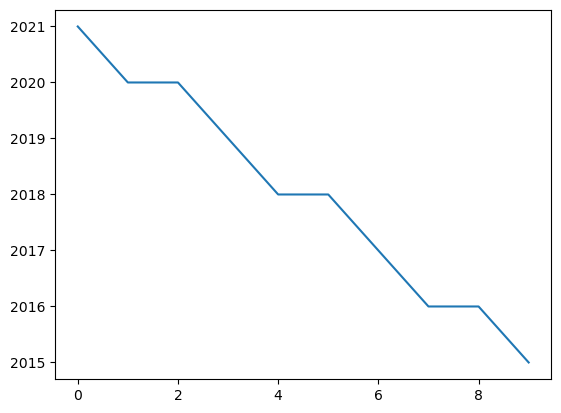

In [59]:

gamesAndRelease = ListGames(Release_Ordered, "Release_Date")
x_price = []
for i in range(len(gamesAndRelease[0])):
    x_price.append(i)
y_price = gamesAndRelease[0]
plt.plot(x_price, y_price)

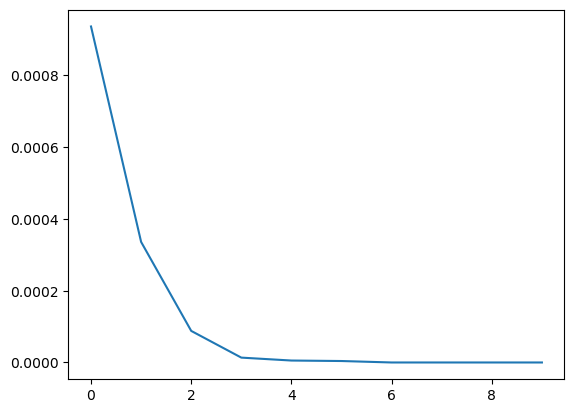

In [60]:
gamesAndXFactor = ListGames(XFactor_Ordered, "XFactor")
x_factor = []
for i in range(len(gamesAndXFactor[0])):
    x_factor.append(i)
y_factor = gamesAndXFactor[0]
plt.plot(x_factor, y_factor)

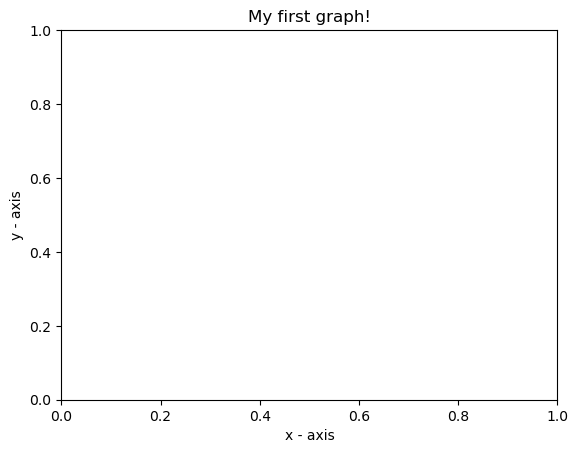

In [61]:
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()

In [62]:
ListGames(Release_Ordered)

TypeError: ListGames() missing 1 required positional argument: 'name'

In [63]:
ListGames(XFactor_Ordered)

TypeError: ListGames() missing 1 required positional argument: 'name'

# User-History Based Recsys

## PCA on data matrix

In [65]:
pca = PCA(n_components=None)

In [66]:
dfx_pca = pca.fit(vector)

In [67]:
r=[]
for i in range(len(dfx_pca.explained_variance_ratio_)):
  r.append(i+1)

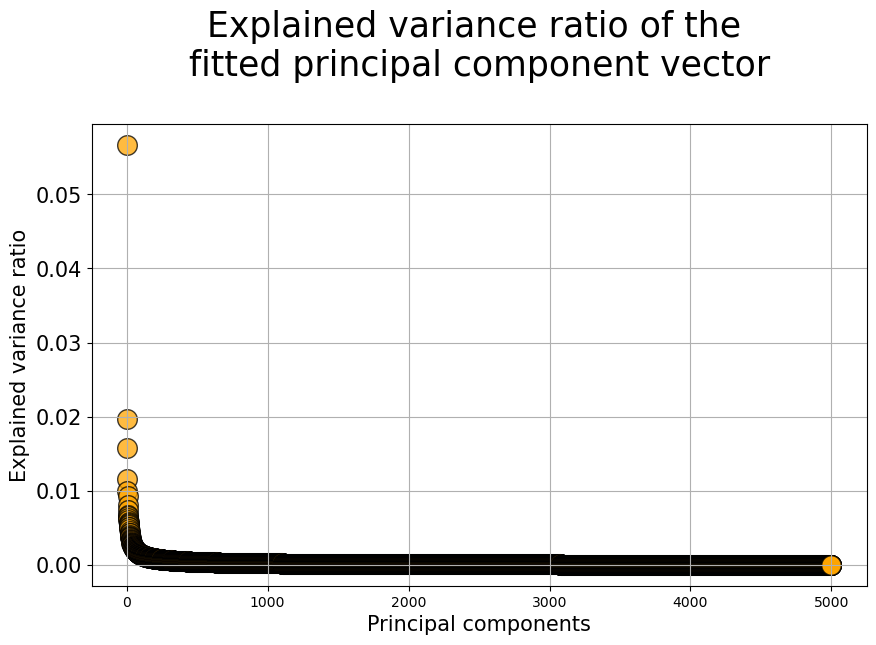

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(x=r,
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
#plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [69]:
total=0
for i in range(len(dfx_pca.explained_variance_ratio_)):
    total=total+dfx_pca.explained_variance_ratio_[i]
    if total>0.9:
     n=i
     print(n)
     break

1867


In [70]:
pca = PCA(n_components=n)

In [71]:
finaldf = pca.fit(vector)

In [72]:
finaldf=pca.transform(vector)

In [73]:
finaldf=pd.DataFrame(finaldf)

In [74]:
finaldf

,0,1,2,3,4,5,6,7,8,9,...,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866
0,-0.729502,0.687477,-0.641385,0.032785,0.236546,0.826429,-1.006304,-0.444173,-0.396475,-0.114984,...,0.070572,0.108275,-0.041844,0.050946,0.062812,0.003485,0.080394,-0.152237,0.244314,0.153807
1,3.857342,-1.164547,-4.204653,-1.304215,-1.401527,0.056480,-0.233718,2.344752,1.066224,0.072569,...,0.006502,-0.133450,0.060365,-0.028397,0.015947,0.027876,-0.160457,0.094107,-0.001705,0.139259
2,-3.499565,0.541343,-0.541699,0.766620,-0.036341,-0.368553,-0.222674,-0.072639,-0.326582,0.175338,...,0.001639,0.002158,0.002734,0.001034,0.000058,0.001126,0.001862,0.001765,0.003462,-0.001801
3,-0.772277,-1.427576,0.550445,-1.955713,-0.572065,0.527786,1.089030,1.360639,-1.549569,-2.682784,...,0.010945,-0.060983,-0.086673,0.008425,-0.023616,-0.013796,0.038651,-0.018142,-0.050297,0.035549
4,-0.415623,1.884035,-0.220164,-0.199249,-0.125936,-0.846926,-0.528246,-0.391655,0.413168,0.148042,...,-0.008220,-0.044801,-0.162155,-0.032557,0.161380,-0.087037,0.101611,-0.188314,0.014262,-0.109838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.738281,-0.762746,-4.684094,-0.318962,0.471780,0.268400,-0.339242,5.473336,0.357536,-3.425327,...,-0.207002,-0.372604,-0.061433,0.144554,0.019567,0.324476,0.193864,-0.116632,0.300339,0.020085
19996,2.267348,-1.473643,0.608813,1.277134,0.544269,3.313697,-1.432982,1.577801,-1.985723,0.152232,...,-0.069368,0.003846,0.076026,-0.022644,0.224254,-0.317034,0.121618,-0.198057,0.182360,0.043904
19997,-1.390138,-0.144814,0.248404,-0.490436,0.429808,0.122241,-0.238757,-0.512848,0.180542,0.139951,...,-0.045990,0.133062,-0.031960,-0.097255,0.143382,0.120399,-0.205556,-0.049161,0.121109,-0.001311
19998,2.502503,2.341593,0.699883,-0.758021,1.625738,-1.399597,-2.092486,-0.296091,-1.430272,-0.274912,...,-0.130534,0.027473,0.027531,-0.065102,0.057814,0.003947,0.137557,0.253845,0.025898,0.126584


## Create A User History

In [75]:
user_history = finaldf.sample(n=20)
centroid=user_history.mean()
finaldf.loc[-1] = centroid
finaldf.index = finaldf.index + 1
finaldf = finaldf.sort_index()
    
new_vector=finaldf.to_numpy()
similarity_centroid=cosine_similarity(new_vector)
game_list_from_centroid=sorted(list(enumerate(similarity_centroid[0])),reverse=True, key=lambda x:x[1])[1:40]
print(game_list_from_centroid)

[(494, 0.5071544384923217), (6448, 0.4629152493253508), (18755, 0.438045533740767), (3163, 0.40940680486492576), (12749, 0.4021340397544125), (10578, 0.3603166019806309), (8815, 0.35271221965616123), (331, 0.35238112248716846), (8786, 0.35213667661454584), (10178, 0.34430107021278733), (8678, 0.3404762895419772), (7223, 0.3359945901590442), (17141, 0.33043870356325106), (3946, 0.3301416035342067), (17011, 0.3226536141686788), (17479, 0.3193944718122527), (18367, 0.3192684326136055), (1599, 0.3191597208208604), (7215, 0.3186395193040094), (11198, 0.31559808793440547), (11457, 0.315403477148481), (13856, 0.31506992393469735), (14310, 0.31295014236209195), (8916, 0.3129174726989994), (10345, 0.31091846407179896), (5426, 0.30631064443882533), (11537, 0.30508934234101515), (9918, 0.3027431948886926), (18607, 0.29939531756205273), (13108, 0.29899915640585484), (3330, 0.29863063185046906), (6348, 0.2981763456469973), (11536, 0.2979009295722159), (7557, 0.2949469704939959), (1118, 0.2945650956

In [76]:
def Average(lst):
    return sum(lst) / len(lst)

In [77]:
myUserData = finaldf.sample(n = 10000)
def ListGames(myUserData, df):
    gameYearSorted = [[],[]]
    for i in myUserData:
        if(df.iloc[i + 1].Release_Date <= 2020):
            gameYearSorted[0].append(finaldf.iloc[i])
        elif(df.iloc[i + 1].Release_Date == 2021):
            gameYearSorted[1].append(finaldf.iloc[i])
    return gameYearSorted
tst = ListGames(myUserData, df)
pre2021 = tst[0]
my2021 = tst[1]
pre2021 = pd.DataFrame(pre2021)
my2021 = pd.DataFrame(my2021)
pre2021.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866
0,1.364738,0.398878,-0.442117,0.507384,-0.026438,0.015336,-0.257576,-0.132095,0.150360,-0.208119,...,-0.021785,-0.028180,-0.009216,-0.020516,0.024323,0.006132,-0.028084,0.105719,0.045257,0.017245
2,3.857342,-1.164547,-4.204653,-1.304215,-1.401527,0.056480,-0.233718,2.344752,1.066224,0.072569,...,0.006502,-0.133450,0.060365,-0.028397,0.015947,0.027876,-0.160457,0.094107,-0.001705,0.139259
3,-3.499565,0.541343,-0.541699,0.766620,-0.036341,-0.368553,-0.222674,-0.072639,-0.326582,0.175338,...,0.001639,0.002158,0.002734,0.001034,0.000058,0.001126,0.001862,0.001765,0.003462,-0.001801
7,2.186374,0.940213,0.468266,1.004105,-0.755443,0.148930,-0.532595,0.716845,-1.539676,0.676576,...,0.000868,-0.041503,0.041448,-0.211327,0.162211,-0.003098,-0.001314,0.006473,0.052223,-0.044762
8,-3.499565,0.541343,-0.541699,0.766620,-0.036341,-0.368553,-0.222674,-0.072639,-0.326582,0.175338,...,0.001639,0.002158,0.002734,0.001034,0.000058,0.001126,0.001862,0.001765,0.003462,-0.001801
9,-0.568959,0.486877,1.025571,0.377062,-1.120375,-0.755296,-0.473855,0.009898,0.405207,-0.404766,...,-0.112210,-0.085350,0.020433,0.044450,-0.079607,0.007442,0.075898,0.199581,0.043073,0.046270
10,0.605957,-1.027186,0.200481,-0.250076,-0.209024,4.041892,-1.022904,0.127199,-1.313110,-0.040107,...,-0.018550,0.131685,0.141336,0.335087,-0.219313,-0.055592,0.062591,-0.056563,0.110884,0.123032
12,9.824545,3.463323,-4.803154,0.957729,-0.969821,-2.179842,-1.223379,5.222376,1.427818,2.771667,...,-0.093411,0.164086,-0.029350,0.030866,-0.059250,-0.164409,0.040966,-0.265802,-0.041224,0.221448
13,-2.205537,0.074540,-0.029239,-0.304693,0.280411,1.331421,0.288296,1.115992,-0.191002,-0.658936,...,-0.085802,0.094413,0.101829,-0.008722,0.070562,0.038722,-0.037212,-0.064685,0.076344,-0.056223
14,1.515402,1.924537,-0.885068,0.998462,1.422998,0.050285,-0.411587,0.583398,0.016772,0.034298,...,-0.104262,-0.008646,0.118631,0.206398,-0.006842,0.121993,0.022113,-0.014753,0.052551,-0.044748


In [78]:
my2021.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866
1,-0.729502,0.687477,-0.641385,0.032785,0.236546,0.826429,-1.006304,-0.444173,-0.396475,-0.114984,...,0.070572,0.108275,-0.041844,0.050946,0.062812,0.003485,0.080394,-0.152237,0.244314,0.153807
4,-0.772277,-1.427576,0.550445,-1.955713,-0.572065,0.527786,1.089030,1.360639,-1.549569,-2.682784,...,0.010945,-0.060983,-0.086673,0.008425,-0.023616,-0.013796,0.038651,-0.018142,-0.050297,0.035549
11,2.166604,-3.582698,2.389040,2.257605,4.521156,-0.889533,-2.392891,2.556502,0.971753,1.604594,...,0.084915,-0.060641,-0.201488,0.038494,-0.168827,-0.024611,0.026359,0.016650,-0.058166,0.187367
26,-1.641923,-1.122691,0.054544,0.997604,-0.303341,1.129091,-0.444677,-0.525893,-0.202225,0.648423,...,0.011137,0.008764,-0.125571,-0.027158,-0.072810,0.002705,0.145900,0.030852,0.024369,0.031410
30,-3.499565,0.541343,-0.541699,0.766620,-0.036341,-0.368553,-0.222674,-0.072639,-0.326582,0.175338,...,0.001639,0.002158,0.002734,0.001034,0.000058,0.001126,0.001862,0.001765,0.003462,-0.001801
39,2.270847,2.913687,1.092231,0.815584,0.074109,-0.453195,-2.818422,-0.046172,0.097635,0.325550,...,0.043991,0.037312,0.020735,-0.077607,0.004450,-0.079119,-0.050635,0.081356,0.023893,0.030314
45,0.036098,0.402297,1.050237,0.024405,-0.618775,-0.066021,-0.623770,0.580868,1.217871,-0.029662,...,0.411079,0.208991,-0.260976,-0.005081,-0.115628,0.132366,0.127989,-0.151102,-0.156753,0.462828
49,0.241155,2.901796,-0.168859,-0.540411,-0.207535,-0.396434,-0.447762,0.259237,0.178935,-0.660749,...,0.138551,-0.023902,0.038398,0.009337,0.039256,-0.145324,-0.103681,0.014001,0.004352,-0.041864
51,-0.122555,1.443085,2.348122,-2.231955,-1.379090,0.334396,0.026922,1.540229,2.557574,0.289561,...,0.079068,0.040397,-0.128728,0.086229,0.106845,0.012391,-0.049649,-0.070367,0.014254,0.039859
53,-3.499565,0.541343,-0.541699,0.766620,-0.036341,-0.368553,-0.222674,-0.072639,-0.326582,0.175338,...,0.001639,0.002158,0.002734,0.001034,0.000058,0.001126,0.001862,0.001765,0.003462,-0.001801


In [79]:
centroid=pre2021.mean()
print(centroid)
pre2021.loc[-1] = centroid
pre2021.index = pre2021.index
pre2021 = finaldf.sort_index()
    
new_vector=pre2021.to_numpy()
similarity_centroid=cosine_similarity(new_vector)
cPre2021=sorted(list(enumerate(similarity_centroid[0])),reverse=True, key=lambda x:x[1])[1:40]
print(cPre2021)

0       0.138460
1       0.040167
2      -0.078288
3      -0.037345
4      -0.076766
          ...   
1862    0.000652
1863   -0.000089
1864    0.001146
1865    0.000316
1866   -0.002189
Length: 1867, dtype: float64
[(494, 0.5071544384923224), (6448, 0.4629152493253506), (18755, 0.43804553374076716), (3163, 0.40940680486492637), (12749, 0.4021340397544133), (10578, 0.36031660198063065), (8815, 0.35271221965616134), (331, 0.3523811224871678), (8786, 0.3521366766145466), (10178, 0.3443010702127881), (8678, 0.34047628954197773), (7223, 0.33599459015904465), (17141, 0.330438703563251), (3946, 0.3301416035342065), (17011, 0.3226536141686784), (17479, 0.3193944718122529), (18367, 0.31926843261360544), (1599, 0.31915972082085997), (7215, 0.31863951930400874), (11198, 0.31559808793440597), (11457, 0.315403477148481), (13856, 0.31506992393469824), (14310, 0.3129501423620917), (8916, 0.31291747269899917), (10345, 0.31091846407179896), (5426, 0.30631064443882533), (11537, 0.305089342341015), (991

In [80]:
centroid2=my2021.mean()
print(centroid2)
my2021.loc[-1] = centroid2
my2021.index = my2021.index
my2021 = finaldf.sort_index()
    
new_vector=my2021.to_numpy()
similarity_centroid=cosine_similarity(new_vector)
cMy2021=sorted(list(enumerate(similarity_centroid[0])),reverse=True, key=lambda x:x[1])[1:40]
print(cMy2021)

0      -0.127422
1       0.048513
2      -0.081054
3      -0.095009
4      -0.020361
          ...   
1862    0.004553
1863   -0.004585
1864   -0.006756
1865    0.006848
1866    0.009728
Length: 1867, dtype: float64
[(494, 0.5071544384923224), (6448, 0.4629152493253506), (18755, 0.43804553374076716), (3163, 0.40940680486492637), (12749, 0.4021340397544133), (10578, 0.36031660198063065), (8815, 0.35271221965616134), (331, 0.3523811224871678), (8786, 0.3521366766145466), (10178, 0.3443010702127881), (8678, 0.34047628954197773), (7223, 0.33599459015904465), (17141, 0.330438703563251), (3946, 0.3301416035342065), (17011, 0.3226536141686784), (17479, 0.3193944718122529), (18367, 0.31926843261360544), (1599, 0.31915972082085997), (7215, 0.31863951930400874), (11198, 0.31559808793440597), (11457, 0.315403477148481), (13856, 0.31506992393469824), (14310, 0.3129501423620917), (8916, 0.31291747269899917), (10345, 0.31091846407179896), (5426, 0.30631064443882533), (11537, 0.305089342341015), (991

In [81]:
def GetName(hlist,frame): 
    allNames = [[],[]]
    for i in hlist:
        if (frame.iloc[i[0]+1].Release_Date <= 2021):
            print("In our training data")
            allNames[0].append(i)
            allNames[0].append(frame.iloc[i[0]+1].Name)
        elif (frame.iloc[i[0]+1].Release_Date == 2021):
            print("Got one! \t \t")
            allNames[1].append(i)
            allNames[1].append(frame.iloc[i[0]+1].Name)
    return allNames
names_sorted = GetName(game_list_from_centroid, df)

In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data


In [82]:
#GetName(cPre2021, df)

In [83]:
def get_user(allData):
    myUserData = [[],[]]
    for i in len(allData):
        if(i % 2):
            myUserData[0].append(i)
        else:
            myUserData[1].append(i)
    return myUserData
print(get_user(GetName(cPre2021, df)))

In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data
In our training data


TypeError: 'int' object is not iterable

## Cosine Similarity with Centroid

In [84]:
print(game_list_from_centroid)

[(494, 0.5071544384923217), (6448, 0.4629152493253508), (18755, 0.438045533740767), (3163, 0.40940680486492576), (12749, 0.4021340397544125), (10578, 0.3603166019806309), (8815, 0.35271221965616123), (331, 0.35238112248716846), (8786, 0.35213667661454584), (10178, 0.34430107021278733), (8678, 0.3404762895419772), (7223, 0.3359945901590442), (17141, 0.33043870356325106), (3946, 0.3301416035342067), (17011, 0.3226536141686788), (17479, 0.3193944718122527), (18367, 0.3192684326136055), (1599, 0.3191597208208604), (7215, 0.3186395193040094), (11198, 0.31559808793440547), (11457, 0.315403477148481), (13856, 0.31506992393469735), (14310, 0.31295014236209195), (8916, 0.3129174726989994), (10345, 0.31091846407179896), (5426, 0.30631064443882533), (11537, 0.30508934234101515), (9918, 0.3027431948886926), (18607, 0.29939531756205273), (13108, 0.29899915640585484), (3330, 0.29863063185046906), (6348, 0.2981763456469973), (11536, 0.2979009295722159), (7557, 0.2949469704939959), (1118, 0.2945650956

In [85]:
def Get_Name(hlist,frame): 
    for i in hlist:
        print(frame.iloc[i[0]+1].Name)
Get_Name(game_list_from_centroid, df)

Unlit
Hope's Journey: A Therapeutic Experience
Flem
MahjongSchool
PRISON OF SON
The Chatters Show
Angel Flare
Crimson Ranch
Avem33
Junkyard Fury
Minotaur's Maze
ASTRA
Project Hunter
Color Guys
Cyber Attack
Last Stanza
Carom Billiards
Atomorf2
Civilization IV: Beyond the Sword
Fun with Ragdolls: The Game
DMT: Dream Dealer
Darkstone
CATMAN-GIMMICK ACTION GAME-
Legend of Fainn Dynasty ～Battles of Beautiful Warlords～
Clown Thug Cop Zombies
Reminiscence
Astro Emporia
The Homestead Invasion
Radiant Defense
The Crimson Diamond: Chapter 1
Mind Spheres
Knight Crawlers Playtest
Catnight
Switch
Brazed
ToeJam & Earl in Panic on Funkotron
Pulut Adventure
The KillBox: Aquarius
Solar 2


In [86]:
def Get_Name(hlist,frame): 
    for i in hlist:
        print(frame.iloc[i[0]+1].Name)
Get_Name(game_list_from_centroid, df)

Unlit
Hope's Journey: A Therapeutic Experience
Flem
MahjongSchool
PRISON OF SON
The Chatters Show
Angel Flare
Crimson Ranch
Avem33
Junkyard Fury
Minotaur's Maze
ASTRA
Project Hunter
Color Guys
Cyber Attack
Last Stanza
Carom Billiards
Atomorf2
Civilization IV: Beyond the Sword
Fun with Ragdolls: The Game
DMT: Dream Dealer
Darkstone
CATMAN-GIMMICK ACTION GAME-
Legend of Fainn Dynasty ～Battles of Beautiful Warlords～
Clown Thug Cop Zombies
Reminiscence
Astro Emporia
The Homestead Invasion
Radiant Defense
The Crimson Diamond: Chapter 1
Mind Spheres
Knight Crawlers Playtest
Catnight
Switch
Brazed
ToeJam & Earl in Panic on Funkotron
Pulut Adventure
The KillBox: Aquarius
Solar 2


In [87]:
price_ordered.head()

,Price,User_Score,Positive,Negative,Achievements,Recommendations,Tags,Release_Date,Name,XFactor
8,0.136546,0.0,0.000004,0.000001,0.0,0.0,"Hello, this is a simple retro car drifting gam...",2020.0,Retro Drift,0.000004
2,0.096386,0.0,0.0,0.0,0.0,0.0,A simple fighting game with one attack. NAIR i...,2021.0,NAIR,0.0
3,0.056225,0.0,0.000487,0.000077,0.0134,0.000449,Vector Assault is a fast paced twin stick shoo...,2015.0,Vector Assault,0.000937
4,0.056225,0.0,0.000195,0.000031,0.0,0.000141,"Bighead Runner is a casual endless runner, avo...",2018.0,Bighead Runner,0.000336
9,0.040161,0.0,0.0,0.000001,0.0,0.0,"Drift between the states, collect bits, beat r...",2020.0,Interstate Drifter 1999,0.0


In [88]:
def make_score_list(hlist, frame):
    final_list = []
    listName = []
    listScore = []
    listPosition = []
    for i in hlist:
        listName.append(frame.iloc[i[0] + 1].Name) 
        listScore.append(i[1])
        listPosition.append(i[0])
    final_list.append(listName) 
    final_list.append(listScore)
    final_list.append(listPosition)
    return final_list

pre2021 = make_score_list(cPre2021, data)
my2021 = make_score_list(my2021, data)
print(format_list)

TypeError: 'int' object is not subscriptable

In [89]:
import math

def calcNDCG(scores1, scores2):
    DCG = 0
    IDCG = 0
    for i in range(len(scores1)):
        DCG += scores1[i] / (math.log2(i + 2))
    for i in range(len(scores2)):
        IDCG += scores2[i] / (math.log2(i + 2))
    print(DCG)
    return DCG / IDCG
calcNDCG(pre2021[2], my2021[2])

99185.87647733434


-13189.97460522869

In [90]:
def checkRecall(scores, frame):
    trackClose = []
    score = scores[0]
    check_loop = 0
    for i in frame:
        print(i)
        if(abs(score - i)):
            trackClose.append(i)
    return trackClose
meanFinaldf = finaldf.mean()
myRecall = checkRecall(format_list[1], meanFinaldf)

NameError: name 'format_list' is not defined

# ConvexHull -To check if this game could fit the user

In [91]:
from scipy.spatial import ConvexHull
import scipy.spatial
from scipy.spatial import Delaunay

In [92]:
pca_convex=PCA(n_components=10)


In [93]:
c_df= pca_convex.fit(vector)

In [94]:
c_df=pca_convex.transform(vector)

In [95]:
c_df=pd.DataFrame(c_df)

In [96]:
user_history_convex=c_df.sample(n=20)

In [103]:
hull = ConvexHull(user_history_convex)

In [115]:
print(hull.simplices)

[[ 9  1 12 ... 10  8  4]
 [14  9  1 ... 10  8  4]
 [14  9  1 ... 13  8  4]
 ...
 [ 2  5  3 ... 13  8  4]
 [ 2 18  3 ... 13 10  4]
 [ 2  6 18 ... 13 10  4]]
